In [ ]:
import numpy as np

# Activation functions
def relu(x):
    """ReLU activation function."""
    return np.maximum(0, x)

def relu_derivative(x):
    """Derivative of the ReLU activation function."""
    return np.where(x > 0, 1, 0)

def linear(x):
    """Linear activation function."""
    return x

def linear_derivative(x):
    """Derivative of the linear activation function."""
    return np.ones_like(x)

# Inputs and weights from the given setup
X = np.array([[0.7, 0.5, 1]])  # Input vector including bias input
y_target = 0.5  # Target output value

# Initial weights
weights_input_hidden = np.array([[-0.3, 0.8], [0.15, 0.2], [0.9, -0.14]])
weights_hidden_output = np.array([[0.7], [0.25], [-0.1]])

learning_rate = 0.03  # Learning rate for weight updates

# Forward propagation
def forward_propagation(X):
    """
    Perform forward propagation through the network.

    Args:
        X (numpy.ndarray): Input vector.

    Returns:
        hidden_input (numpy.ndarray): Input to the hidden layer.
        hidden_output (numpy.ndarray): Output from the hidden layer.
        hidden_output_with_bias (numpy.ndarray): Hidden layer output including bias.
        final_input (numpy.ndarray): Input to the output layer.
        final_output (numpy.ndarray): Output from the network.
    """
    hidden_input = np.dot(X, weights_input_hidden)
    hidden_output = relu(hidden_input)
    hidden_output_with_bias = np.append(hidden_output, 1)  # Adding bias to the hidden layer output
    final_input = np.dot(hidden_output_with_bias, weights_hidden_output)
    final_output = linear(final_input)
    return hidden_input, hidden_output, hidden_output_with_bias, final_input, final_output

# Backward propagation and weight update
def backward_propagation(X, hidden_input, hidden_output_with_bias, final_output):
    """
    Perform backward propagation and update weights.

    Args:
        X (numpy.ndarray): Input vector.
        hidden_input (numpy.ndarray): Input to the hidden layer.
        hidden_output_with_bias (numpy.ndarray): Hidden layer output including bias.
        final_output (numpy.ndarray): Output from the network.

    Returns:
        error_output (numpy.ndarray): Error at the output layer.
    """
    global weights_input_hidden, weights_hidden_output

    # Output layer error
    error_output = final_output - y_target
    delta_output = error_output * linear_derivative(final_output)

    # Hidden layer error
    error_hidden = delta_output * weights_hidden_output[:-1].T
    delta_hidden = error_hidden * relu_derivative(hidden_input)

    # Update weights
    weights_hidden_output -= learning_rate * np.outer(hidden_output_with_bias, delta_output)
    weights_input_hidden -= learning_rate * np.outer(X.T, delta_hidden)

    return error_output

# Training for a single epoch
hidden_input, hidden_output, hidden_output_with_bias, final_input, final_output = forward_propagation(X)
mse_error_before = 0.5 * (final_output - y_target) ** 2

print(f'Hidden Output (before): {hidden_output}')
print(f'Final Output (before): {final_output}')
print(f'Error (before - MSE): {mse_error_before}')

error_output = backward_propagation(X, hidden_input, hidden_output_with_bias, final_output)

print(f'Updated weights from input to hidden layer: \n{weights_input_hidden}')
print(f'Updated weights from hidden to output layer: \n{weights_hidden_output}')

# Forward propagation after weight update
hidden_input_updated, hidden_output_updated, hidden_output_with_bias_updated, final_input_updated, final_output_updated = forward_propagation(X)
mse_error_after = 0.5 * (final_output_updated - y_target) ** 2

print(f'Hidden Output (after): {hidden_output_updated}')
print(f'Final Output (after): {final_output_updated}')
print(f'Error (after - MSE): {mse_error_after}')


Hidden Output (before): [[0.765 0.52 ]]
Final Output (before): [0.5655]
Error (before - MSE): [0.00214513]
Updated weights from input to hidden layer: 
[[-0.30096285  0.79965613]
 [ 0.14931225  0.19975438]
 [ 0.8986245  -0.14049125]]
Updated weights from hidden to output layer: 
[[ 0.69849677]
 [ 0.2489782 ]
 [-0.101965  ]]
Hidden Output (after): [[0.76260663 0.51914522]]
Final Output (after): [0.55996912]
Error (after - MSE): [0.00179815]


Code Demo Task:
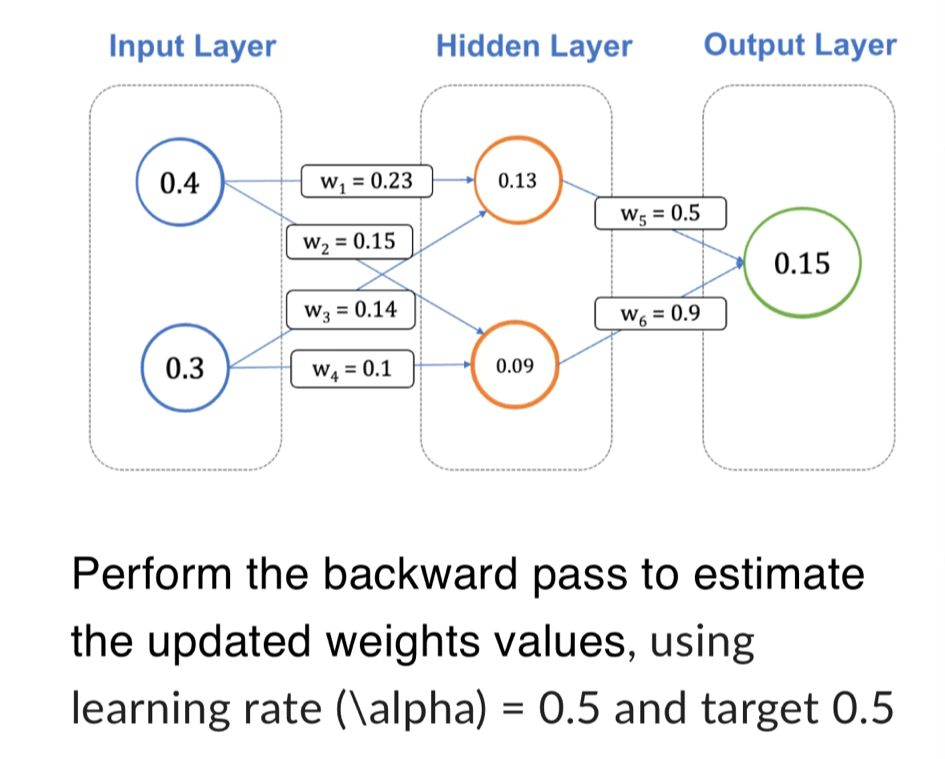